<a href="https://colab.research.google.com/github/PaulLipska/Food-Sales-Predictions/blob/main/Paul_Lipska_Food_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Food_Sales_Predictions**
  

Name: Paul Lipska

## Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filename = '/content/drive/MyDrive/CodingDojo/02_Week_2:Pandas/sales_predictions/sales_predictions.csv'
df = pd.read_csv(filename)
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


## Data Cleaning

In [4]:
df.shape

(8523, 12)

      * There are 8523 rows and 12 columns

In [5]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Identified irregular strings meant to resemble the same data

In [7]:

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')

In [8]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Column 'Item_Fat_Content' cleaned

In [9]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

Grocery Store could be perceived as a fourth type.  Changing data to conform

In [10]:

df['Outlet_Type'] = df['Outlet_Type'].replace('Grocery Store', 'Supermarket Type4')

In [11]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Supermarket Type4    1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

This fits better with the data

Reviewing integers and floats, found no glaring differences.  Formating data for dollar ammounts by rounding to 2nd place

In [12]:

df['Item_MRP'] = df['Item_MRP'].round(2)
df['Item_Outlet_Sales'] = df['Item_Outlet_Sales'].round(2)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.016760,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.10,OUT010,1998,NaN,Tier 3,Supermarket Type4,732.38
4,NCD19,8.93,Low Fat,0.000000,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


Dollar values expressed correctly

In [13]:
df.duplicated().sum()

0

  * Zero duplicates

In [14]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Identifying % of missing data (optional)

In [15]:
df.isna().sum() / len(df) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [16]:
df[df.isna().any(axis =1)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.10,OUT010,1998,NaN,Tier 3,Supermarket Type4,732.38
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.76,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.76
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.97,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.60
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.82,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.54
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.28,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.67
...,...,...,...,...,...,...,...,...,...,...,...,...
8504,NCN18,NaN,Low Fat,0.124111,Household,111.75,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.61
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.47,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.96
8509,FDG45,8.10,Low Fat,0.214306,Fruits and Vegetables,213.99,OUT010,1998,NaN,Tier 3,Supermarket Type4,424.78
8514,FDA01,15.00,Regular,0.054489,Canned,57.59,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.72


    * Missing Values
      *There are 1463 missing values in the Item_Weight column. (17.1%)
      *There are 2410 missing values in the Outlet_Size column. (28.27%)
    *In order to make informed decisions about have to handle missing data, we will do some additional EDA
    

## Evaluating missing values

In [17]:
#value counts prior to remedy
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

Resolving NAN values

In [18]:
# Finding the average weight of values in 'Item Weight' column

avg_weight = df['Item_Weight'].median()
print(avg_weight)

12.6


Replacing NAN values with Median value

In [19]:
df['Item_Weight'].fillna(avg_weight, inplace = True)

In [20]:
#value counts after remedy
df['Item_Weight'].value_counts()

12.600    1516
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: Item_Weight, Length: 415, dtype: int64

Used method .median() to cure NAN in 'Item_Weight'

In [21]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Resolving NAN values in 'Outlet_Size'.  Replacing NAN values with "Missing"

In [22]:
#value counts prior to remedy
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [23]:
#fill in NAN values with "Missing"
df['Outlet_Size'].fillna('Missing', inplace = True)

In [24]:
#value counts after remedy
df['Outlet_Size'].value_counts()

Medium     2793
Missing    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

All NAN values removed and replaced with "Missing"

In [25]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Explanatory Visuals

See below for results of cured data sets.

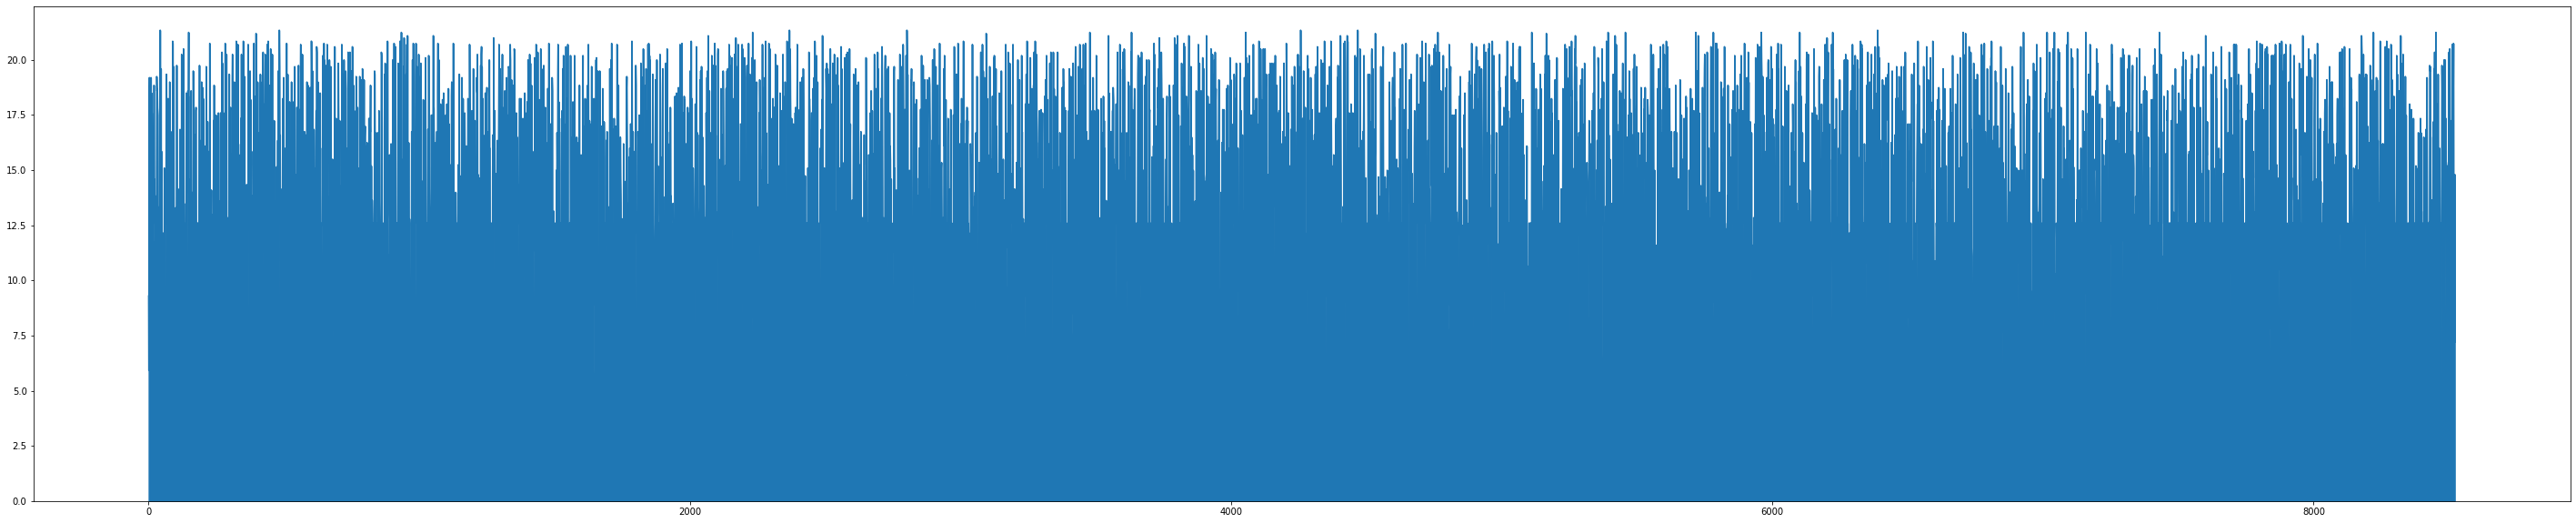

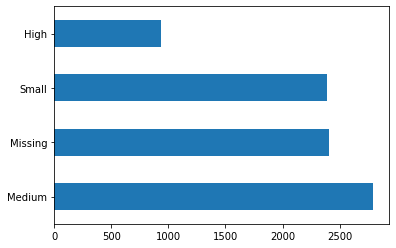

In [26]:
res=df['Item_Weight']

axs = res.plot.area(figsize=(50,10), subplots = True)

plt.show()

df['Outlet_Size'].value_counts()[:20].plot(kind='barh')

#Min, Max, Mean of datasets

Item_Weight

In [27]:

df['Item_Weight'].describe()

count    8523.00000
mean       12.81342
std         4.22724
min         4.55500
25%         9.31000
50%        12.60000
75%        16.00000
max        21.35000
Name: Item_Weight, dtype: float64

Item_Visibility

In [28]:
df['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

Item_MRP

In [29]:
df['Item_MRP'].describe()

count    8523.000000
mean      140.992810
std        62.275166
min        31.290000
25%        93.825000
50%       143.010000
75%       185.645000
max       266.890000
Name: Item_MRP, dtype: float64

Outlet_Establishment_Year

In [30]:
df['Outlet_Establishment_Year'].describe()

count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

Item_Outlet_Sales

In [31]:
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288926
std       1706.499605
min         33.290000
25%        834.245000
50%       1794.330000
75%       3101.300000
max      13086.960000
Name: Item_Outlet_Sales, dtype: float64